# John Carchi
# Courtney Chambers
# Samuel Kim

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [333]:
# set the font size
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

In [339]:
temperature = temperature[0:-1:3]

#### Loading the Power Data

In [341]:
dateConverter = lambda d : dt.datetime.strptime(d.decode('utf-8'),\
                                                '%Y/%m/%d %H:%M:%S')
power = np.genfromtxt('downloads/campusDemand.csv',delimiter=",",\
        names=True,dtype=['S255',dt.datetime,'f8'],converters={1: dateConverter})

In [342]:
name, indices, counts  = np.unique(power['Point_name'], return_index=True,return_counts=True)

In [343]:
for i in range(len(name)):
    print(str(name[i])+"\n\t from "+str(power[indices[i]]['Time'])+\
          " to "+str(power[indices[i]+counts[i]-1]['Time'])+"\n\t or "+\
          str(power[indices[i]+counts[i]-1]['Time']-power[indices[i]]['Time']))
    

Baker Hall Electric (Shark 29) - Demand Watts 
	 from 2014-02-12 07:03:27 to 2014-11-10 22:04:28
	 or 271 days, 15:01:01
Baker Hall Electric (Shark 29) - Watts
	 from 2014-11-03 00:00:24 to 2014-11-10 22:43:28
	 or 7 days, 22:43:04
Doherty Apts Electric (Shark 11) - Demand Watts
	 from 2014-10-10 09:13:56 to 2014-11-10 21:52:28
	 or 31 days, 12:38:32
Electric kW Calculations - Main Campus kW
	 from 2013-11-10 00:00:30 to 2014-11-10 22:53:27
	 or 365 days, 22:52:57
Porter Hall Electric (Shark 30) - Watts
	 from 2014-09-10 00:00:50 to 2014-11-10 22:42:28
	 or 61 days, 22:41:38
Scaife Hall Electric (Shark 21) - Watts
	 from 2014-10-10 00:00:15 to 2014-11-10 22:45:28
	 or 31 days, 22:45:13
University Center Electric (Shark 34) - Watts
	 from 2014-11-03 00:00:24 to 2014-11-10 22:48:28
	 or 7 days, 22:48:04


Here all the building data is taken and stored. 

In [407]:
powerBaker=power[power['Point_name']==name[0]]
powerDoherty=power[power['Point_name']==name[2]]
powerPorter=power[power['Point_name']==name[4]]
powerScaife=power[power['Point_name']==name[5]]
powerMaincampus=power[power['Point_name']==name[3]]

Here the values across all four buildings are sorted. 

In [345]:
#You can also do 
'''power = np.sort(power,order='Time')'''
# which is the same thing if you have enough RAM(>4GB)
time_ix1 = sorted(range(len(powerBaker)), key=lambda x: powerBaker[x]['Time'])
powerBaker = powerBaker[time_ix1]
time_ix2 = sorted(range(len(powerDoherty)), key=lambda x: powerDoherty[x]['Time'])
powerDoherty = powerDoherty[time_ix2]
time_ix3 = sorted(range(len(powerPorter)), key=lambda x: powerPorter[x]['Time'])
powerPorter = powerPorter[time_ix3]
time_ix4 = sorted(range(len(powerScaife)), key=lambda x: powerScaife[x]['Time'])
powerScaife = powerScaife[time_ix4]
time_ix4 = sorted(range(len(powerMaincampus)), key=lambda x: powerMaincampus[x]['Time'])
powerMaincampus = powerMaincampus[time_ix4]

In [346]:
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(powerBaker['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(powerBaker['Time']))) )

print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(powerDoherty['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(powerDoherty['Time']))) ) 

print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(powerPorter['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(powerPorter['Time']))) ) 

print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(powerScaife['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(powerScaife['Time']))) )  

print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(powerMaincampus['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(powerMaincampus['Time']))) )

The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 17:38:47
The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 17:50:47
The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 17:29:47
The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 17:29:47
The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 1 day, 2:50:49


And when is the first and last timestamp for this dataset? (We would like them to overlap as much as possible):

In [347]:
print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(powerBaker['Time'][0], powerBaker['Time'][-1]))

print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(powerDoherty['Time'][0], powerDoherty['Time'][-1]))

print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(powerPorter['Time'][0], powerPorter['Time'][-1]))

print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(powerScaife['Time'][0], powerScaife['Time'][-1]))

print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(powerMaincampus['Time'][0], powerMaincampus['Time'][-1]))

First timestamp is on 	2014-02-12 07:03:27. 
Last timestamp is on 	2014-11-10 22:04:28.
First timestamp is on 	2014-10-10 09:13:56. 
Last timestamp is on 	2014-11-10 21:52:28.
First timestamp is on 	2014-09-10 00:00:50. 
Last timestamp is on 	2014-11-10 22:42:28.
First timestamp is on 	2014-10-10 00:00:15. 
Last timestamp is on 	2014-11-10 22:45:28.
First timestamp is on 	2013-11-10 00:00:30. 
Last timestamp is on 	2014-11-10 22:53:27.


### Harmonizing the time series

In [348]:
print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(powerBaker['Time'][0], powerBaker['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(powerDoherty['Time'][0], powerDoherty['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(powerPorter['Time'][0], powerPorter['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(powerScaife['Time'][0], powerScaife['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(powerMaincampus['Time'][0], powerMaincampus['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

Power data from 2014-02-12 07:03:27 to 2014-11-10 22:04:28.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00
Power data from 2014-10-10 09:13:56 to 2014-11-10 21:52:28.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00
Power data from 2014-09-10 00:00:50 to 2014-11-10 22:42:28.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00
Power data from 2014-10-10 00:00:15 to 2014-11-10 22:45:28.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00
Power data from 2013-11-10 00:00:30 to 2014-11-10 22:53:27.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00


Here the appropriate number of temperature data are taken to correspond to the right number of dimensions that will be specified later on in the notebook. 

In [352]:
temperature=temperature[0:-48]
temperature1 = temperature[len(temperature)-2689:len(temperature)-1]


(datetime.datetime(2014, 11, 10, 16, 45), 58.59)
2688
(datetime.datetime(2014, 10, 13, 16, 45), 65.53)


In [353]:
def power_interp(tP, P, tT):
    # This function assumes that the input is an numpy.ndarray of datetime objects

    # Most useful interpolation tools don't work well with datetime objects
    # so we convert all datetime objects into the number of seconds elapsed
    # since 1/1/1970 at midnight (also called the UNIX Epoch, or POSIX time):
    
    toposix = lambda d: (d - dt.datetime(1970,1,1,0,0,0)).total_seconds()
    tP = list(map(toposix, tP))
    tT = list(map(toposix, tT))
    
    # Now we interpolate
    from scipy.interpolate import interp1d
    f = interp1d(tP, P,'linear')
    
    return f(tT)
    

In [443]:
newPowerValuesBaker = power_interp(powerBaker['Time'], powerBaker['Value']/1000, temperature1['timestamp'])
newPowerValuesDoherty = power_interp(powerDoherty['Time'], powerDoherty['Value']/1000, temperature1['timestamp'])
newPowerValuesPorter = power_interp(powerPorter['Time'], powerPorter['Value']/1000, temperature1['timestamp'])
newPowerValuesScaife = power_interp(powerScaife['Time'], powerScaife['Value']/1000, temperature1['timestamp'])
newPowerValuesMaincampus = power_interp(powerMaincampus['Time'], powerMaincampus['Value'], temperature1['timestamp'])

In [474]:
toposix = lambda d: (d - dt.datetime(1970,1,1,0,0,0)).total_seconds()

timestamp_in_seconds = map(toposix,temperature1['timestamp'])
timestamps = temperature1['timestamp']
temp_values = temperature1['tempF']
power_valuesBaker = newPowerValuesBaker
power_valuesDoherty = newPowerValuesDoherty
power_valuesPorter = newPowerValuesPorter
power_valuesScaife = newPowerValuesScaife
power_valuesMaincampus=newPowerValuesMaincampus

[788]

Here are the graphs for the power consumption across all four buildings against time. 

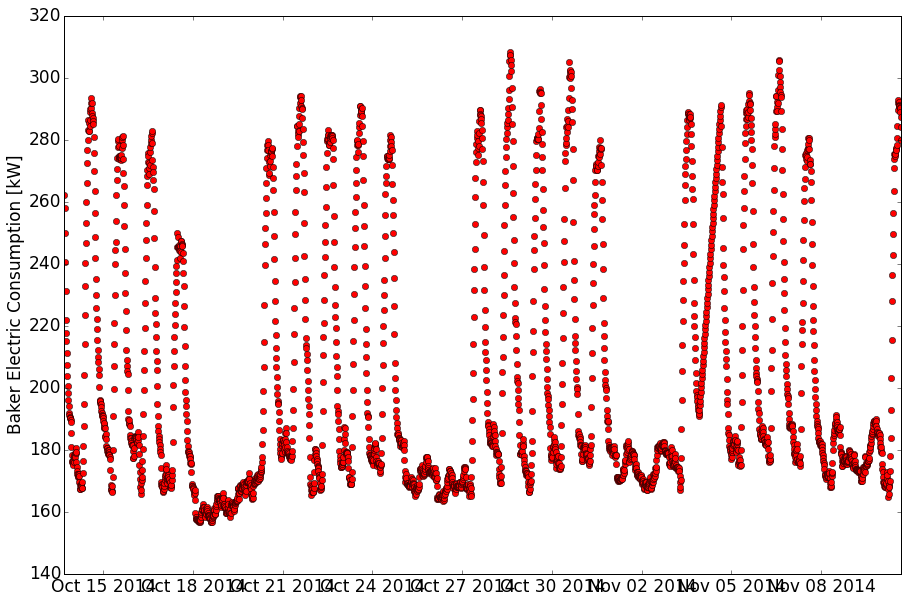

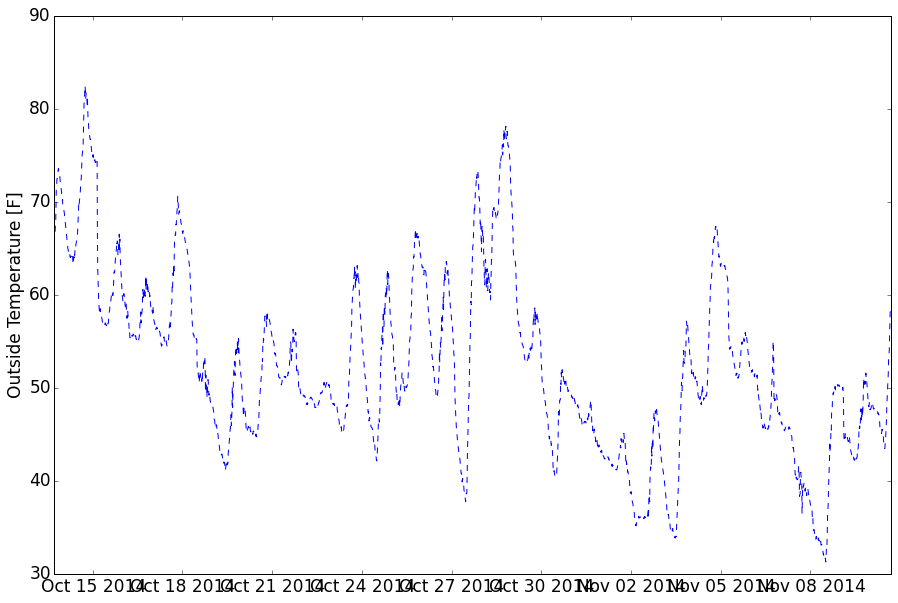

In [451]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_valuesBaker,'ro')
plt.ylabel('Baker Electric Consumption [kW]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')

plt.ylabel('Outside Temperature [F]')

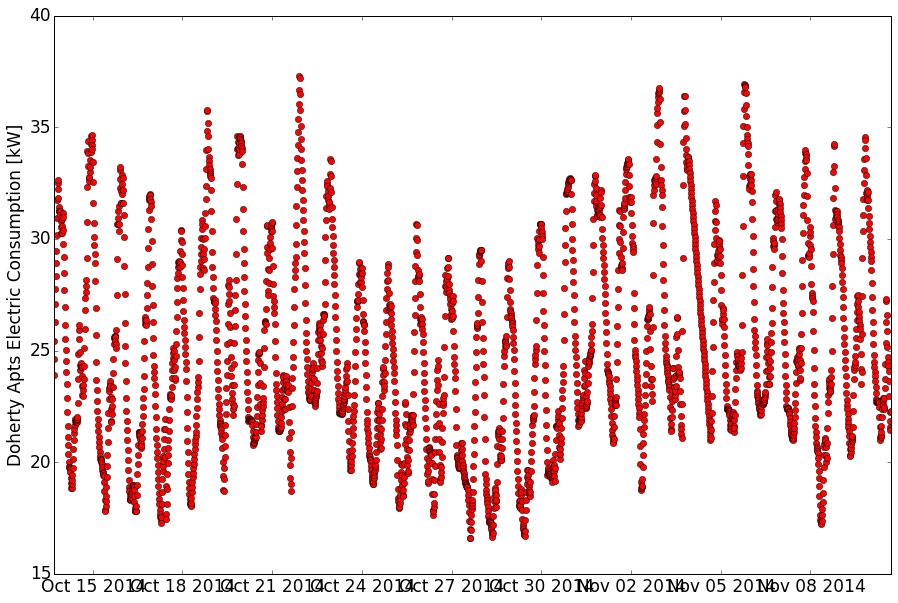

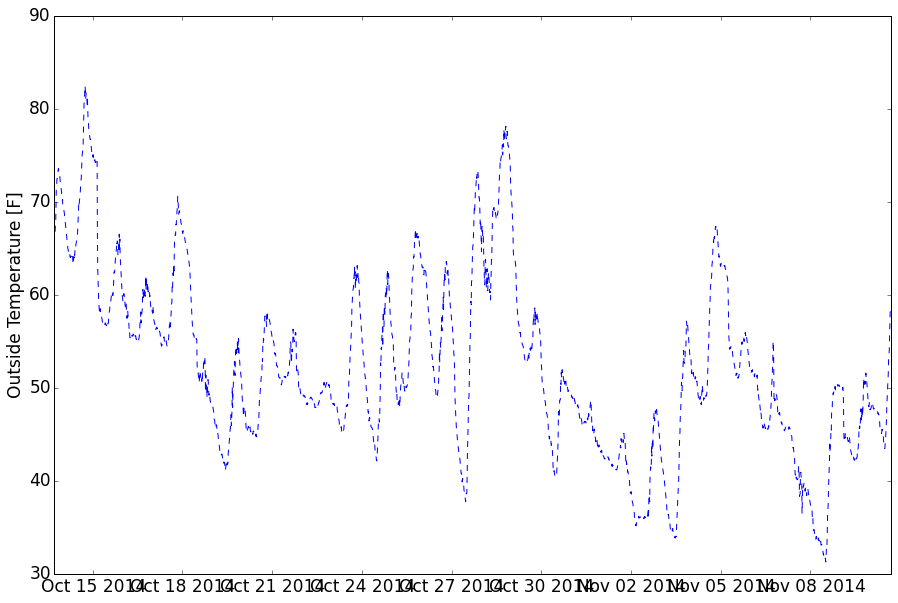

In [480]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_valuesDoherty,'ro')
plt.ylabel('Doherty Apts Electric Consumption [kW]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')
plt.ylabel('Outside Temperature [F]')

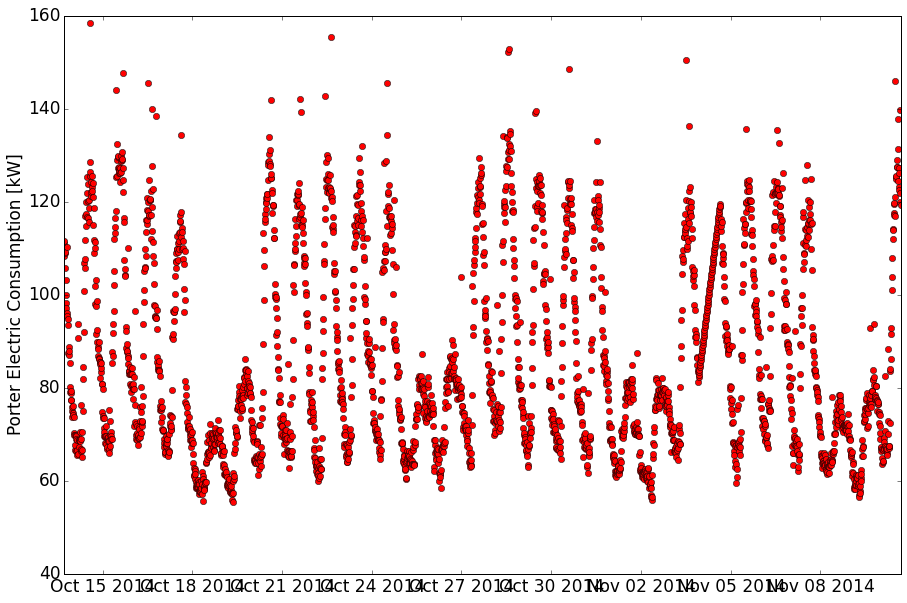

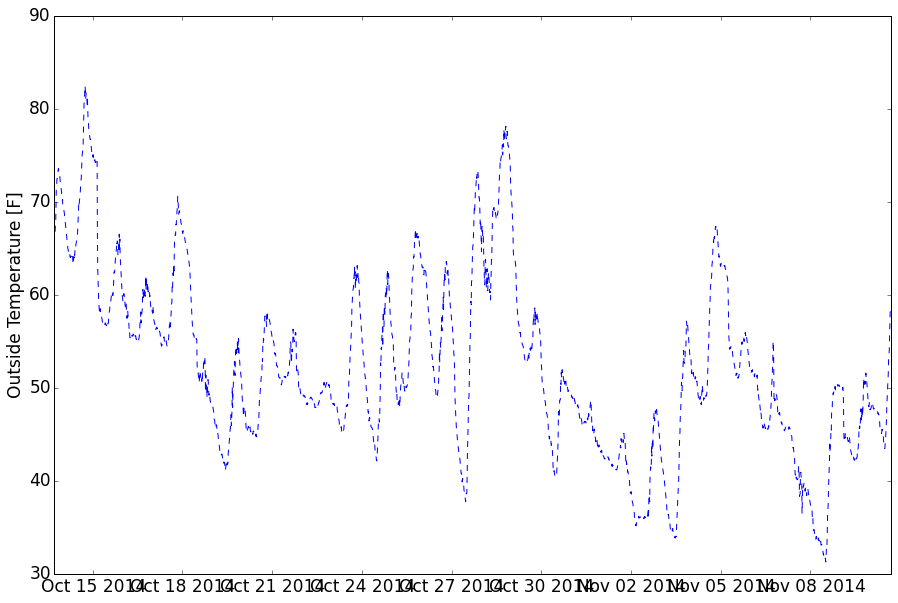

In [481]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_valuesPorter,'ro')
plt.ylabel('Porter Electric Consumption [kW]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')
plt.ylabel('Outside Temperature [F]')

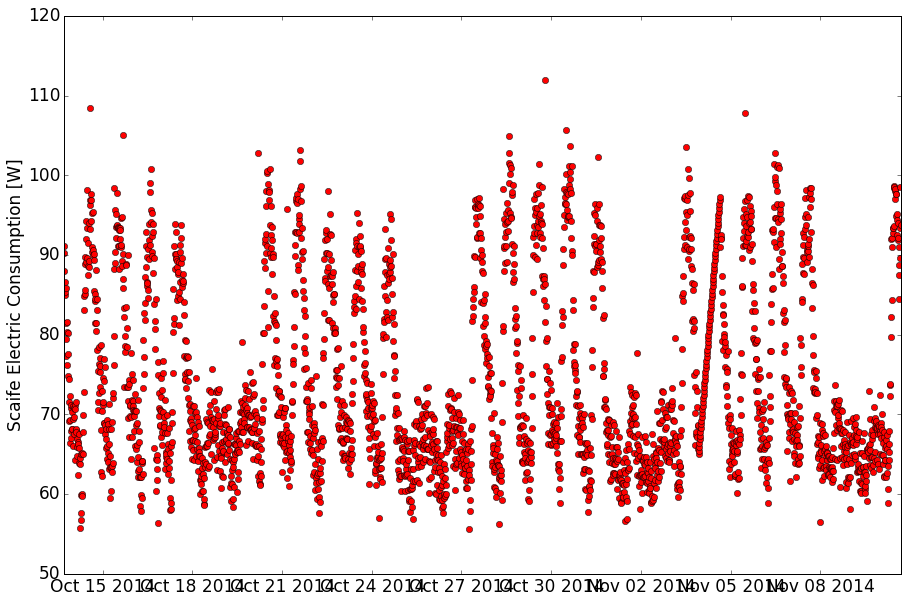

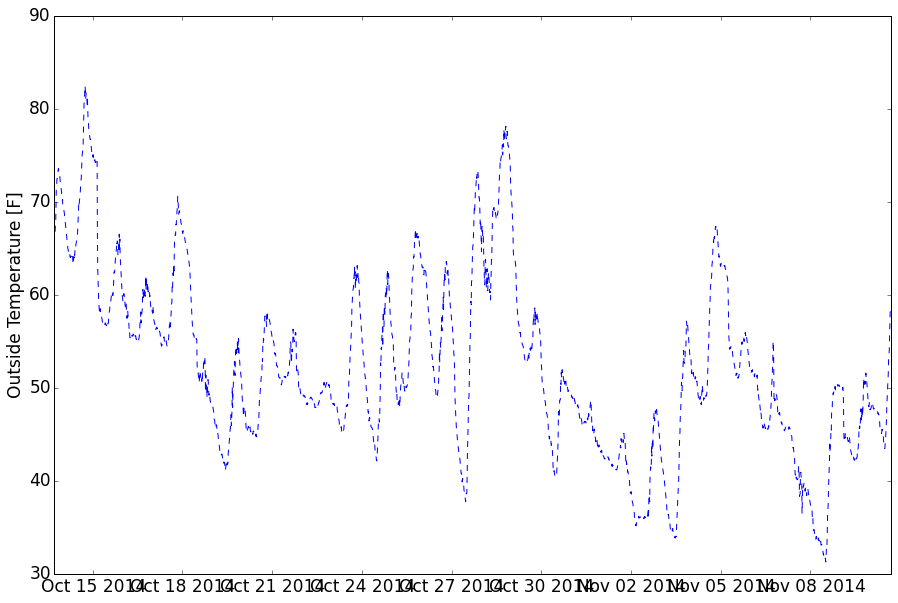

In [414]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_valuesScaife,'ro')
plt.ylabel('Scaife Electric Consumption [W]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')
plt.ylabel('Outside Temperature [F]')

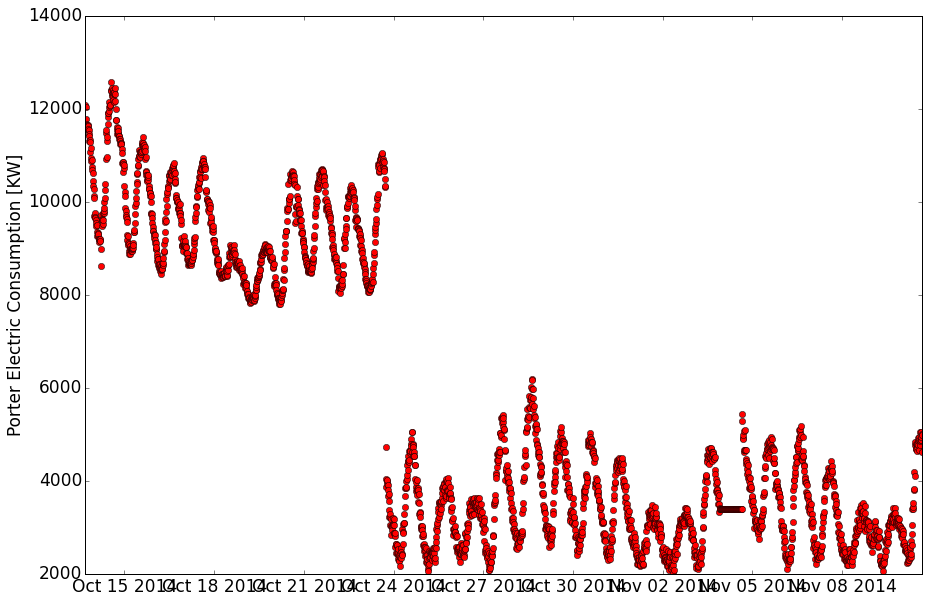

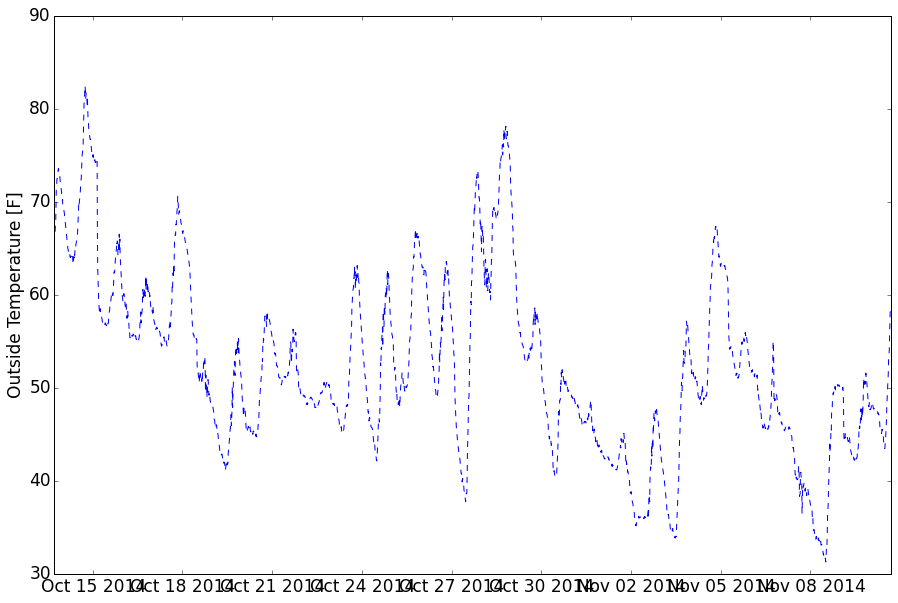

In [416]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_valuesMaincampus,'ro')
plt.ylabel('Porter Electric Consumption [KW]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')
plt.ylabel('Outside Temperature [F]')

Here we put all the data from each building into a structured array. 

In [417]:
dataBaker = np.vstack((timestamps,power_valuesBaker,temp_values)).T
dataDoherty = np.vstack((timestamps,power_valuesDoherty,temp_values)).T
dataPorter = np.vstack((timestamps,power_valuesPorter,temp_values)).T
dataScaife = np.vstack((timestamps,power_valuesScaife,temp_values)).T
dataMaincampus = np.vstack((timestamps,power_valuesMaincampus,temp_values)).T

In [419]:
def Tc(temperature, T_bound):
    # The return value will be a matrix with as many rows as the temperature
    # array, and as many columns as len(T_bound) [assuming that 0 is the first boundary]
    
    Tc_matrix = np.zeros((len(temperature), len(T_bound)+1))
    
    for (i,t) in enumerate(temperature):
        # first chunk
        if t <= T_bound[0]:
            Tc_matrix[i,0] = t
            continue
        else:
            Tc_matrix[i,0] = T_bound[0]
       
        # chunks in the middle
        n = 1
        while(n < len(T_bound)-1 and t > T_bound[n]):
            Tc_matrix[i,n] = T_bound[n+1] - T_bound[n]
            n += 1
        if(n < len(T_bound) and t <= T_bound[n]):
            Tc_matrix[i,n] = t - T_bound[n-1]
            continue
        
        # last chunk
        if(t > T_bound[-1]):
            if(len(T_bound)>1):
                Tc_matrix[i,-2] = T_bound[-1] - T_bound[-2]
            Tc_matrix[i,-1] = t - T_bound[-1]
    
    return Tc_matrix

In [420]:
def DesignMatrix(temperature, T_bound, dim):
    
    # dim represents how many data points you want to count as one sample
    # in the case of the paper, dim=480
    m = len(temperature)
    # check if the input is valid
    if np.mod(m,dim) != 0:
        print('Invalid dimension, the number of points is %d but the dimension is %d.'\
             % (m,dim))
        print('The number of points should be integer multiple of the dimension size.')
        print('Please try again with vlaid arguments.')
        return
    num_sample = m//dim
    num_chunks = len(T_bound) + 1
    
    DM = np.zeros((len(temperature) ,  dim + num_chunks))
    
    # first column ones representing intercept
    # DM[:,0] = np.ones(m)
    # repeat identify matrix of dim
    DM[:,0:-num_chunks] = np.vstack([np.eye(dim)] * num_sample)
    # append Tc at end
    DM[:,-num_chunks:] = Tc(temperature, T_bound)
    
    return DM

In [421]:
def beta_hat(X, power_values):
    # check rank of X to see if it's valid
#     from numpy.linalg import matrix_rank
    mr = np.linalg.matrix_rank(X)
    min_dim = min(X.shape)
    if mr < min_dim:
        print('Singular Matrix Warning: matrix rank %d but the minimum dimension %d'\
             % (mr, min_dim))
    # use formula to calculate beta, instead of using inverse, we use pseudo inverse
    return np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(power_values)

Here the number of points and the number of samples are found. Also, the middle point that we will halve our data sample into training and testing data is made. 

In [534]:
dim = 4*24*7

num_point = len(power_valuesBaker)

truncated_point = num_point//dim * dim


Here the training and testing data are made for each building model. 

In [533]:
data_Baker = power_valuesBaker[:truncated_point]
data_Doherty = power_valuesDoherty[:truncated_point]
data_Porter = power_valuesPorter[:truncated_point]
data_Scaife = power_valuesScaife[:truncated_point]
data_Maincampus = power_valuesMaincampus[:truncated_point]
sum_data=power_valuesBaker+power_valuesDoherty+power_valuesPorter+power_valuesScaife
print np.mean(sum_data)
print np.mean(power_valuesMaincampus)
print np.mean(sum_data)/np.mean(power_valuesMaincampus)

trainData_Baker = dataBaker[:truncated_point//dim//2*dim]
testData_Baker = dataBaker[truncated_point//dim//2*dim:]

trainData_Doherty = dataDoherty[:truncated_point//dim//2*dim]
testData_Doherty = dataDoherty[truncated_point//dim//2*dim:]

trainData_Porter = dataPorter[:truncated_point//dim//2*dim]
testData_Porter = dataPorter[truncated_point//dim//2*dim:]

trainData_Scaife = dataScaife[:truncated_point//dim//2*dim]
testData_Scaife = dataScaife[truncated_point//dim//2*dim:]

trainData_Maincampus = dataMaincampus[:truncated_point//dim//2*dim]
testData_Maincampus = dataMaincampus[truncated_point//dim//2*dim:]

389.724978474
5585.34904561
0.069776297827


Here the temperature bounds are found for each building. 

In [425]:
# get T_bound
num_chunk = 4
print dataBaker[0]

T_boundBaker = np.linspace(min(dataBaker[:,2]),max(dataBaker[:,2]),num_chunk+1)[1:-1]
T_boundDoherty = np.linspace(min(dataDoherty[:,2]),max(dataDoherty[:,2]),num_chunk+1)[1:-1]
T_boundPorter = np.linspace(min(dataPorter[:,2]),max(dataPorter[:,2]),num_chunk+1)[1:-1]
T_boundScaife = np.linspace(min(dataScaife[:,2]),max(dataScaife[:,2]),num_chunk+1)[1:-1]
T_boundMaincampus = np.linspace(min(dataMaincampus[:,2]),max(dataMaincampus[:,2]),num_chunk+1)[1:-1]

[datetime.datetime(2014, 10, 13, 16, 45) 262.235198046875 65.53]


Here the design matrices are made for each building model. 

In [427]:
DM_Baker = DesignMatrix(trainData_Baker[:,2], T_boundBaker, dim)
DM_Doherty = DesignMatrix(trainData_Doherty[:,2], T_boundDoherty, dim)
DM_Porter = DesignMatrix(trainData_Porter[:,2], T_boundPorter, dim)
DM_Scaife = DesignMatrix(trainData_Scaife[:,2], T_boundScaife, dim)

Here the beta hat coefficients are calculated for each building. 

In [520]:
beta_trainBaker = beta_hat(DM_Baker,trainData_Baker[:,1])
beta_trainDoherty = beta_hat(DM_Doherty,trainData_Doherty[:,1])
beta_trainPorter = beta_hat(DM_Porter,trainData_Porter[:,1])
beta_trainScaife = beta_hat(DM_Scaife,trainData_Scaife[:,1])

Here the the predicted power consumption values are generated for each building and the sum stored. 

In [526]:
predictedBaker = DesignMatrix(testData_Baker[:,2], T_boundBaker, dim).dot(beta_trainBaker)
predictedDoherty = DesignMatrix(testData_Doherty[:,2], T_boundDoherty, dim).dot(beta_trainDoherty)
predictedPorter = DesignMatrix(testData_Porter[:,2], T_boundPorter, dim).dot(beta_trainPorter)
predictedScaife = DesignMatrix(testData_Scaife[:,2], T_boundScaife, dim).dot(beta_trainScaife)
sum_predicted=predictedBaker+predictedDoherty+predictedPorter+predictedScaife

Here the sum for the the predicted power consumption for the train data is made and the sum stored across all four buildings. 

In [527]:
predictedBaker1 = DesignMatrix(trainData_Baker[:,2], T_boundBaker, dim).dot(beta_trainBaker)
predictedDoherty1 = DesignMatrix(trainData_Doherty[:,2], T_boundDoherty, dim).dot(beta_trainDoherty)
predictedPorter1 = DesignMatrix(trainData_Porter[:,2], T_boundPorter, dim).dot(beta_trainPorter)
predictedScaife1 = DesignMatrix(trainData_Scaife[:,2], T_boundScaife, dim).dot(beta_trainScaife)
sum_predicted1=predictedBaker1+predictedDoherty1+predictedPorter1+predictedScaife1

Here the graphs for the true data and our generated model predictions are made. One is made using the testing data and the other using the training data. The R^2 value is also calculated using the equation from Homework 3. 

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(testData_Maincampus[:,0],testData_Maincampus[:,1],'.b')
plt.plot(testData_Maincampus[:,0],sum_predicted,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData_Maincampus[:,0],trainData_Maincampus[:,1],'.b')
plt.plot(trainData_Maincampus[:,0],sum_predicted1,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

In [454]:
power_testaverageBaker= np.average(power_valuesBaker)
num = testData_Baker[:,1] - (DM_Baker.dot(beta_trainBaker))
den = testData_Baker[:,1] - power_testaverageBaker


R2_Baker = 1 - (num.T.dot(num))/(den.T.dot(den))
print R2_Baker

0.911225599284


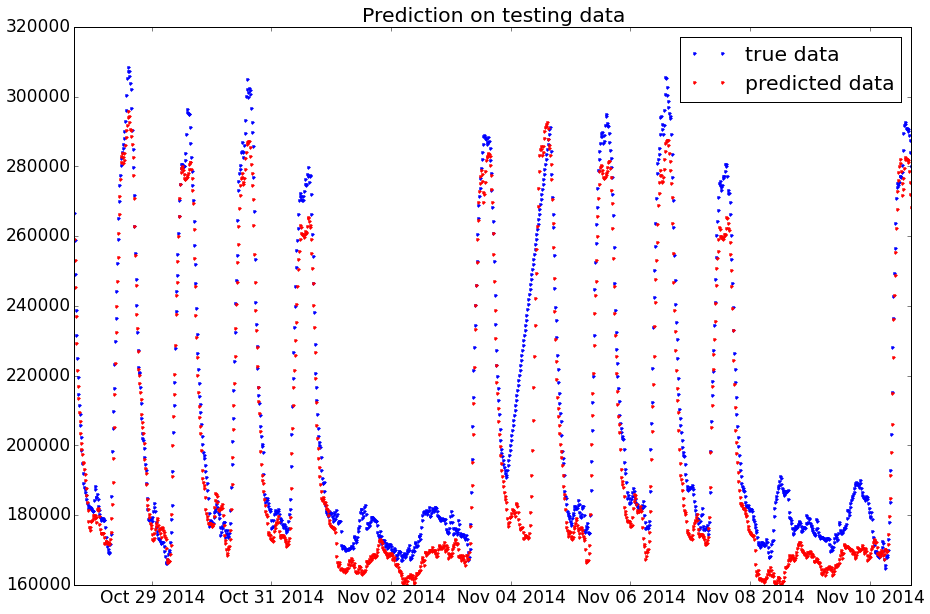

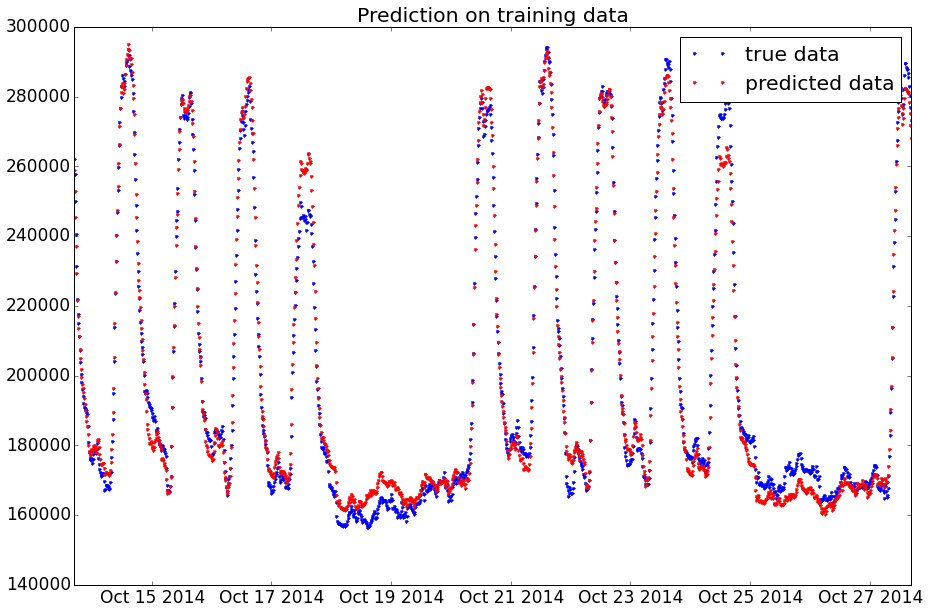

In [378]:

plt.figure(figsize=(15,10))
plt.plot(testData_Baker[:,0],testData_Baker[:,1],'.b')
plt.plot(testData_Baker[:,0],predictedBaker,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData_Baker[:,0],trainData_Baker[:,1],'.b')
plt.plot(trainData_Baker[:,0],DesignMatrix(trainData_Baker[:,2], T_boundBaker, dim).dot(beta_trainBaker),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

In [458]:
power_testaverageDoherty= np.average(power_valuesDoherty)
num = testData_Doherty[:,1] - (DM_Doherty.dot(beta_trainDoherty))
den = testData_Doherty[:,1] - power_testaverageDoherty


R2_Doherty = 1 - (num.T.dot(num))/(den.T.dot(den))
print R2_Doherty

0.520821846593


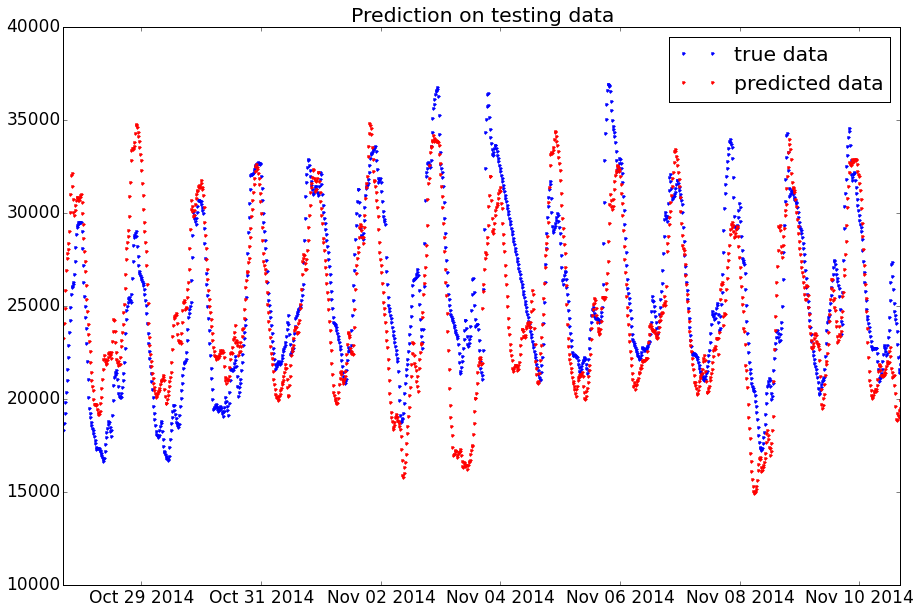

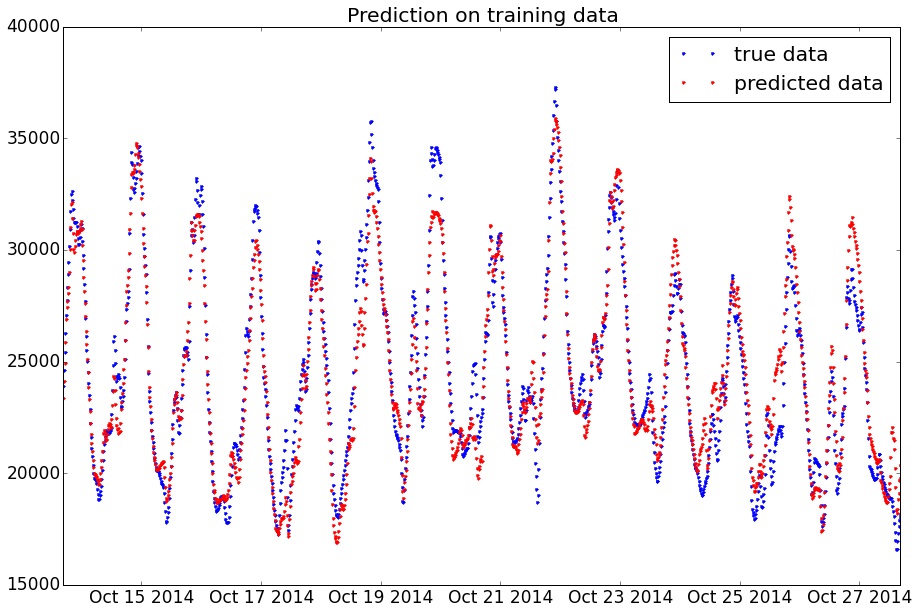

In [379]:
plt.figure(figsize=(15,10))
plt.plot(testData_Doherty[:,0],testData_Doherty[:,1],'.b')
plt.plot(testData_Doherty[:,0],predictedDoherty,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData_Doherty[:,0],trainData_Doherty[:,1],'.b')
plt.plot(trainData_Doherty[:,0],DesignMatrix(trainData_Doherty[:,2], T_boundDoherty, dim).dot(beta_trainDoherty),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

In [459]:
power_testaveragePorter= np.average(power_valuesPorter)
num = testData_Porter[:,1] - (DM_Porter.dot(beta_trainPorter))
den = testData_Porter[:,1] - power_testaveragePorter


R2_Porter = 1 - (num.T.dot(num))/(den.T.dot(den))
print R2_Porter

0.867952575186


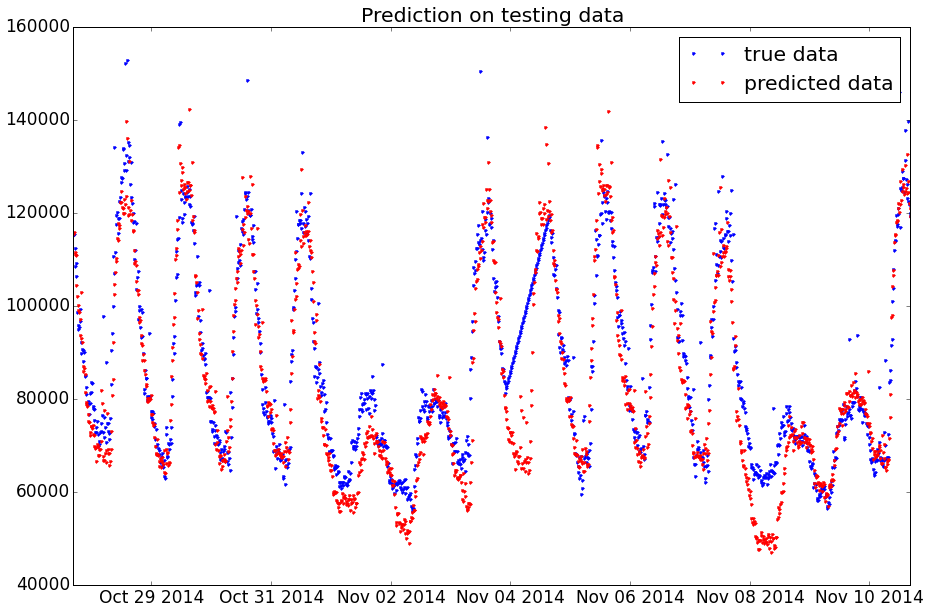

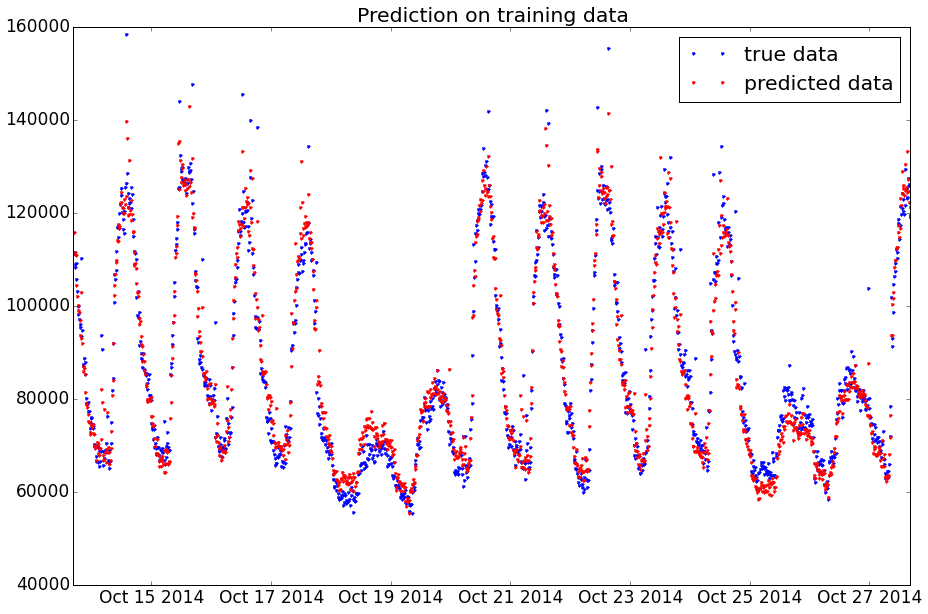

In [380]:
plt.figure(figsize=(15,10))
plt.plot(testData_Porter[:,0],testData_Porter[:,1],'.b')
plt.plot(testData_Porter[:,0],predictedPorter,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData_Porter[:,0],trainData_Porter[:,1],'.b')
plt.plot(trainData_Porter[:,0],DesignMatrix(trainData_Porter[:,2], T_boundPorter, dim).dot(beta_trainPorter),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

In [460]:
power_testaverageScaife= np.average(power_valuesScaife)
num = testData_Scaife[:,1] - (DM_Scaife.dot(beta_trainScaife))
den = testData_Scaife[:,1] - power_testaverageScaife


R2_Scaife = 1 - (num.T.dot(num))/(den.T.dot(den))
print R2_Scaife

0.827746830344


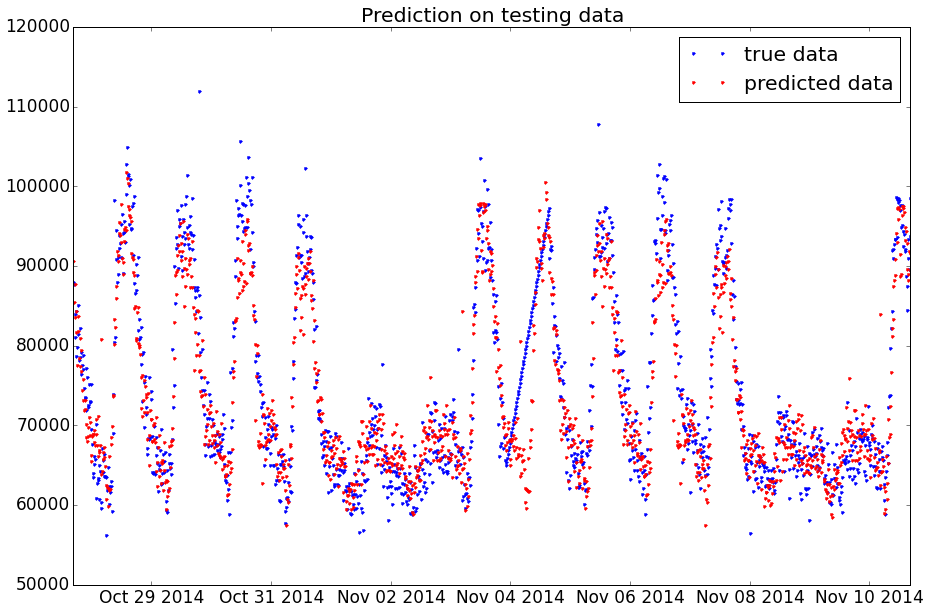

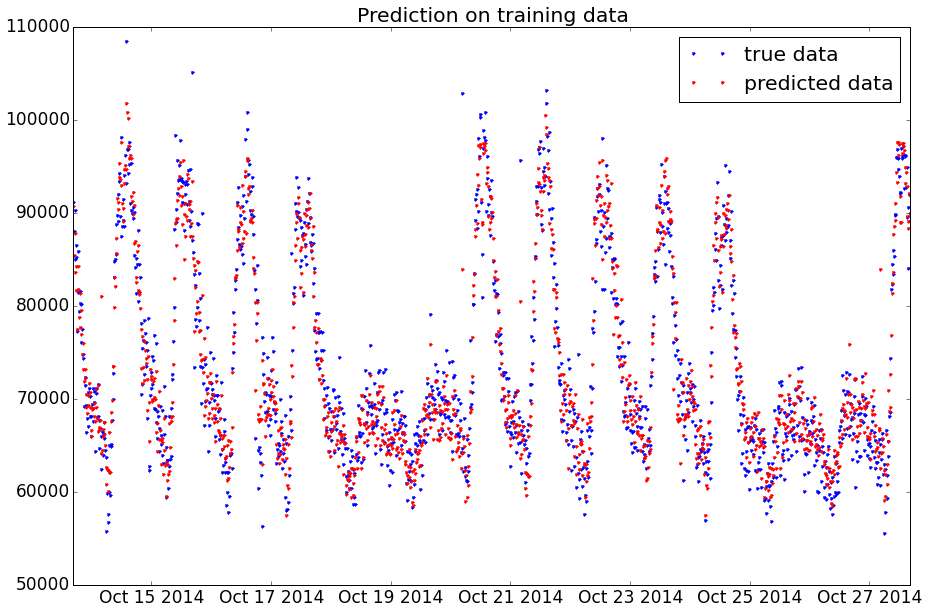

In [381]:
plt.figure(figsize=(15,10))
plt.plot(testData_Scaife[:,0],testData_Scaife[:,1],'.b')
plt.plot(testData_Scaife[:,0],predictedScaife,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData_Scaife[:,0],trainData_Scaife[:,1],'.b')
plt.plot(trainData_Scaife[:,0],DesignMatrix(trainData_Scaife[:,2], T_boundScaife, dim).dot(beta_trainScaife),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

Computing the confidence intervals for all four models. 

In [466]:
alpha_avgBaker = np.mean(beta_trainBaker[0:480])
alpha_stdBaker = np.std(beta_trainBaker[0:480])
beta_avgBaker = np.mean(beta_trainBaker[480:486])
beta_stdBaker = np.std(beta_trainBaker[480:486])

alpha_upperBaker = alpha_avgBaker + (2*alpha_stdBaker)
alpha_bottomBaker = alpha_avgBaker - (2*alpha_stdBaker)
beta_upperBaker = beta_avgBaker + (2*beta_stdBaker)
beta_bottomBaker = beta_avgBaker - (2*beta_stdBaker)

In [467]:
alpha_intervalBaker = [alpha_bottomBaker,alpha_upperBaker]
beta_intervalBaker = [beta_bottomBaker,beta_upperBaker]
print alpha_intervalBaker
print beta_intervalBaker

[110.69904576665951, 275.87762591605838]
[153.55288669948868, 154.81492479865079]


In [468]:
alpha_avgDoherty = np.mean(beta_trainDoherty[0:480])
alpha_stdDoherty = np.std(beta_trainDoherty[0:480])
beta_avgDoherty = np.mean(beta_trainDoherty[480:486])
beta_stdDoherty = np.std(beta_trainDoherty[480:486])

alpha_upperDoherty = alpha_avgDoherty + (2*alpha_stdDoherty)
alpha_bottomDoherty = alpha_avgDoherty - (2*alpha_stdDoherty)
beta_upperDoherty = beta_avgDoherty + (2*beta_stdDoherty)
beta_bottomDoherty = beta_avgDoherty - (2*beta_stdDoherty)

In [469]:
alpha_intervalDoherty = [alpha_bottomDoherty,alpha_upperDoherty]
beta_intervalDoherty = [beta_bottomDoherty,beta_upperDoherty]
print alpha_intervalDoherty
print beta_intervalDoherty

[-5.6167446430422139, 11.854572995444201]
[3.190916137563824, 7.6498804875278461]


In [470]:
alpha_avgPorter = np.mean(beta_trainPorter[0:480])
alpha_stdPorter = np.std(beta_trainPorter[0:480])
beta_avgPorter = np.mean(beta_trainPorter[480:486])
beta_stdPorter = np.std(beta_trainPorter[480:486])

alpha_upperPorter = alpha_avgPorter + (2*alpha_stdPorter)
alpha_bottomPorter = alpha_avgPorter - (2*alpha_stdPorter)
beta_upperPorter = beta_avgPorter + (2*beta_stdPorter)
beta_bottomPorter = beta_avgPorter - (2*beta_stdPorter)

In [471]:
alpha_intervalPorter = [alpha_bottomPorter,alpha_upperPorter]
beta_intervalPorter = [beta_bottomPorter,beta_upperPorter]
print alpha_intervalPorter
print beta_intervalPorter

[0.25681931441475569, 85.979514341758076]
[24.390680564974836, 31.045011560087431]


In [472]:
alpha_avgScaife = np.mean(beta_trainScaife[0:480])
alpha_stdScaife = np.std(beta_trainScaife[0:480])
beta_avgScaife = np.mean(beta_trainScaife[480:486])
beta_stdScaife = np.std(beta_trainScaife[480:486])

alpha_upperScaife = alpha_avgScaife + (2*alpha_stdScaife)
alpha_bottomScaife = alpha_avgScaife - (2*alpha_stdScaife)
beta_upperScaife = beta_avgScaife + (2*beta_stdScaife)
beta_bottomScaife = beta_avgScaife - (2*beta_stdScaife)

In [473]:
alpha_intervalScaife = [alpha_bottomScaife,alpha_upperScaife]
beta_intervalScaife = [beta_bottomScaife,beta_upperScaife]
print alpha_intervalScaife
print beta_intervalScaife

[55.594107539013407, 97.505584299683193]
[66.569321999488096, 71.90008748722434]
